<a href="https://colab.research.google.com/github/danielrr25/CAP4630_A.I/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Homework

This is the first assignment for CAP 4630 and we will develop two basic models with regression. \
You will use **"Tasks"** and **"Hints"** to finish the work. **(Total 100 Points)**


**Task Overview:**
- Singal Variable Nonlinear Regression
- Multiple Variable Linear Regression


## 1 - Packages ##

Import useful packages for scientific computing and data processing. **(5 Points)**

**Tasks:**
1. Import numpy and rename it to np.
2. Import pandas and rename it to pd.
3. Import the pyplot function in the libraray of matplotlib and rename it to plt.

References:
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.

**Attention:**
1. After this renaming, you will use the new name to call functions. For example, **numpy** will become **np** in the following sections.


In [ ]:
# PID 5368340
# Name Daniel Rodriguez
# Collaboration:
# xxx, xxx and xxx (TAs or Students help your hw, UCF standard practice)

# Coding here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2 - Data Preparation ##

Prepare the data for regression task. **(10 Points)**

**Tasks:**
1. Load data for nonlinear regression.
2. Generate the scatter plot of the data.

**Hints:**
1. The data file is "data_nonlinear.csv".
2. The data format is as follows: 1st column is X and 2nd column is Y.

In [ ]:
# Coding here
from google.colab import files
uploaded = files.upload()


Saving data_nonlinear.csv to data_nonlinear.csv
Saving data_two_variables.csv to data_two_variables.csv


## 3 - Single Variable Nonlinear Regression ##


Develop a regression model, estimate coefficients with data, and derive the relationship. **(30 Points)**

**Tasks:**
1. Establish a relationship between Y and X with a cubic function.
2. Compute MSE loss with observation-prediction pairs.
3. Implement **Gradient Descent (GD)** to achieve optimal solution with the learning rate of **0.000001 (1e-6)** and **10000 (1e4)** epochs.
4. Print out the optimal solution at final step.

**Hints:**  
1. Given the example of linear regression in class, modify the function to an equation for a spline with coefficients of **a** , **b**, **c** and **d** for cubic, qudractic, linear, and constant term.
2. Initialize the model with zero. For example, a=0, b=0, c=0 and d=0.
3. It may take **10-15 seconds**  to finish the running for 10000 steps. Be patient.
4. For debugging, the results of **a**, **b**, **c**, **d** for first five steps are as follows:

Epoch  0 :  2.8045093168662314 0.15006631239563697 0.04047903434004733 0.0030023401200892003 \
Epoch  1 :  4.905935374329749 0.2803623842843468 0.07068280026181122 0.0057565282228493 \
Epoch  2 :  6.480417434500056 0.395779237410925 0.09318576969022647 0.008323648642107889 \
Epoch  3 :  7.65996806232127 0.49998280146312246 0.10991745268097952 0.010749486523089888 \
Epoch  4 :  8.543527816733905 0.5957208253596222 0.12232397430880633 0.013068360586717544



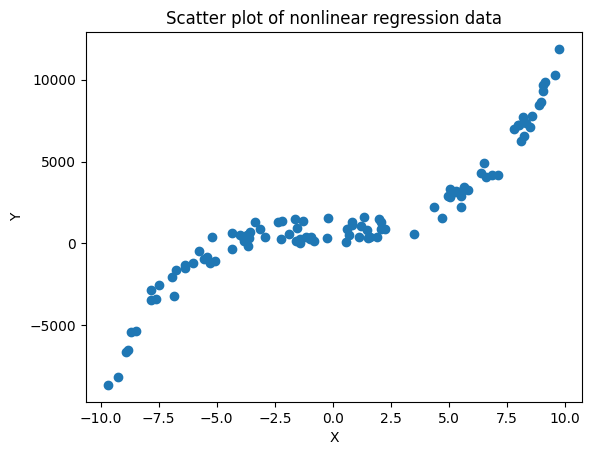

In [ ]:
# Coding here
# Using the data_nonlinear.csv
data_nonlinear = pd.read_csv('data_nonlinear.csv')
X = data_nonlinear.iloc[:, 0]  # Assuming the first column is X
Y = data_nonlinear.iloc[:, 1]  # Assuming the second column is Y

# Scatter plot
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of nonlinear regression data')
plt.show()



## 4 - Prediction Results ##

Derive prediction function and generate estmated results. **(5 Points)**

**Tasks:**
1. Derive prediction function with the obtained coefficients above.
2. Generate scatter plots for original data pairs X-Y and prediction results X-Y_Pred in the same figure.

In [ ]:
# Initial coefficients
a, b, c, d = 0, 0, 0, 0

# Learning rate and number of epochs
learning_rate = 1e-6
epochs = 10000

# Gradient descent
for epoch in range(epochs):
    # Predicted Y values for the current coefficients
    Y_pred = a * X**3 + b * X**2 + c * X + d

    # Calculate the error
    error = Y - Y_pred

    # Calculate gradients for each coefficient
    a_grad = -(2/len(X)) * sum(X**3 * error)
    b_grad = -(2/len(X)) * sum(X**2 * error)
    c_grad = -(2/len(X)) * sum(X * error)
    d_grad = -(2/len(X)) * sum(error)

    # Update coefficients
    a -= learning_rate * a_grad
    b -= learning_rate * b_grad
    c -= learning_rate * c_grad
    d -= learning_rate * d_grad

    # Optionally print the coefficients at certain steps
    if epoch % (epochs // 10) == 0:
        print(f"Epoch {epoch}: a={a}, b={b}, c={c}, d={d}")

# Print the final, optimized coefficients
print(f"Optimized coefficients: a={a}, b={b}, c={c}, d={d}")



Epoch 0: a=2.8045093168662314, b=0.15006631239563697, c=0.040479034340047314, d=0.0030023401200892003
Epoch 1000: a=10.647252612427875, b=20.45597573030273, c=-0.12892852066472116, d=1.1230509670711475
Epoch 2000: a=10.63300192769785, b=21.0634906880633, c=-0.3262891262083068, d=1.8986372471239683
Epoch 3000: a=10.635410370677949, b=21.068524506178182, c=-0.5187603740176553, d=2.6629358976861903
Epoch 4000: a=10.638305806704775, b=21.05493089005479, c=-0.7091428951402953, d=3.426170551326428
Epoch 5000: a=10.641187938754861, b=21.04078155332997, c=-0.8975419069801501, d=4.188658750446892
Epoch 6000: a=10.644041551958571, b=21.02663576424652, c=-1.0839790208594973, d=4.950411412554063
Epoch 7000: a=10.646866443450905, b=21.01251073548151, c=-1.2684730860267137, d=5.711429959095643
Epoch 8000: a=10.649662872483834, b=20.998406902503287, c=-1.451042693644725, d=6.471715512427208
Epoch 9000: a=10.652431110092973, b=20.98432418231546, c=-1.6317062559333337, d=7.231269180527069
Optimized coe

## 5 - Multiple Variables Linear Regression ##

## 5.1 Data Preparation

Prepare the data for regression task. **(10 Points)**

**Tasks:**
1. Load data for multiple variable linear regression.
2. Generate the 3D scatter plot of the data.

**Hints:**
1. The data file is "data_two_variables.csv".
2. The data format is as follows: 1st column is X1, 2nd column is X2, and 3rd colum is Y.
3. You may use "mplot3d" in the toolkit of "mpl_toolkits" and import "Axes3D" to faciliate 3D scatter plot. More details can be found in the reference of https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
4. [Optional, NO Credit]You may rotate the figure you generated by using "%matplotlib qt" before you plot it. Remember to install the related package by "!pip install PyQt5". Only work on Jupyter(locally). Does not work on Google Colab. [Reference Website](https://stackoverflow.com/questions/14261903/how-can-i-open-the-interactive-matplotlib-window-in-ipython-notebook)

![](https://drive.google.com/uc?export=view&id=1sHwWfZXpU3-8SqzFrmCxIvxmQWfe2Nns)
![](https://drive.google.com/uc?export=view&id=1OwHP0g-K2um-LnKiDhE6UfkDFxk4Opce)


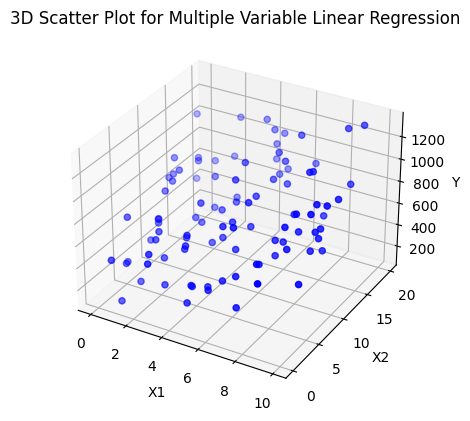

In [ ]:
# Coding here
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
data = pd.read_csv('data_two_variables.csv')

# Extract X1, X2, and Y
X1 = data.iloc[:, 0]  # First column is X1
X2 = data.iloc[:, 1]  # Second column is X2
Y = data.iloc[:, 2]   # Third column is Y

# Create a new figure for the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for X1, X2, and Y
ax.scatter(X1, X2, Y, color='b')

# Labeling the axes
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

# Title for the plot
plt.title('3D Scatter Plot for Multiple Variable Linear Regression')

# Show the plot
plt.show()



## 5.2 Linear Regression

Develop a regression model, estimate coefficients with data, and derive the relationship. **(30 Points)**

**Tasks:**
1. Establish a linear function to describe the relationship among Y, X1, and X2.
2. Compute MSE loss with observation-prediction pairs.
3. Implement **Gradient Descent (GD)** to achieve optimal solution with the learning rate of **0.001 (1e-3)** and **10000 (1e4)** epochs.
4. Print out the optimal solution at final step.


**Hints:**  
1. Given the example of linear regression in class, modify the function to a linear equation with two independent variables X1 and X2. The coefficients of X1 and X2 are **m1** and **m2**, respectively. The constant term is **m3**.
2. Initialize the model with zero. For example, m1=0, m2=0, and m3=0.
3. It may take **10-15 seconds**  to finish the running for 10000 steps. Be patient.
4. For debugging, the results of **m1**, **m2**, and **m3** for first five steps are as follows:

Epoch 0: 7.43847600018326 15.595631430047339 1.4265844915879997 \
Epoch 1: 12.954483113402425 26.731746959534096 2.481143659135288 \
Epoch 2: 17.084193849045587 34.664109745712814 3.2680146970514863 \
Epoch 3: 20.213137348549306 40.2953527521597 3.8622050343066556 \
Epoch 4: 22.618552798604984 44.274269323103674 4.317638791453634 \
Epoch 5: 32.734943422646175 34.69592128962032 222.91661391579638

In [ ]:
import numpy as np
import pandas as pd

# Assuming you've already loaded your data into a DataFrame called 'data'
X1 = data['X1'].values  # Convert to NumPy array if not already
X2 = data['X2'].values  # Convert to NumPy array if not already
Y = data['Y'].values    # Convert to NumPy array if not already

# Initialize coefficients
m1, m2, m3 = 0, 0, 0

# Learning rate and epochs
learning_rate = 0.001
epochs = 10000

# Gradient Descent
for epoch in range(epochs):
    # Make predictions
    Y_pred = m1*X1 + m2*X2 + m3

    # Calculate the error
    error = Y - Y_pred

    # Calculate the gradients
    m1_grad = -(2/len(X1)) * np.dot(error, X1)
    m2_grad = -(2/len(X2)) * np.dot(error, X2)
    m3_grad = -(2/len(Y)) * np.sum(error)

    # Update the coefficients
    m1 -= learning_rate * m1_grad
    m2 -= learning_rate * m2_grad
    m3 -= learning_rate * m3_grad

    # Compute Mean Squared Error (MSE) for monitoring
    mse = np.mean(error**2)

    # Optional: Print the coefficients and MSE every 1000 epochs (or adjust as needed)
    if epoch % 1000 == 0 or epoch == epochs - 1:
        print(f'Epoch {epoch}: m1={m1}, m2={m2}, m3={m3}, MSE={mse}')

# Print the final, optimized coefficients
print(f'Optimized coefficients: m1={m1}, m2={m2}, m3={m3}')


Epoch 0: m1=7.438476000183261, m2=15.595631430047339, m3=1.4265844915880002, MSE=571960.7348399095
Epoch 1000: m1=45.45263157783553, m2=42.40720553184438, m3=64.75228477917575, MSE=24560.69835419326
Epoch 2000: m1=41.95503219203836, m2=40.28645978768808, m3=108.25039966520293, MSE=22637.172079916127
Epoch 3000: m1=39.351921165899086, m2=38.70808101386466, m3=140.62415376963838, MSE=21571.696799429297
Epoch 4000: m1=37.41453890260783, m2=37.53336237510719, m3=164.718530217003, MSE=20981.511165622374
Epoch 5000: m1=35.97262958855049, m2=36.65907040974998, m3=182.65092614842771, MSE=20654.596887336244
Epoch 6000: m1=34.89947923027624, m2=36.00837294444315, m3=195.99722811826095, MSE=20473.51327698475
Epoch 7000: m1=34.10078011637458, m2=35.52408713588751, m3=205.93029991475353, MSE=20373.207857136334
Epoch 8000: m1=33.506343121009635, m2=35.16365428210682, m3=213.32305301874433, MSE=20317.64690807288
Epoch 9000: m1=33.06392953207708, m2=34.89539979314717, m3=218.82515746098386, MSE=20286.


## 5.3 - Prediction Results ##

Derive prediction function and generate estmated results. **(10 Points)**

**Tasks:**
1. Derive prediction function with the obtained coefficients above.
2. Generate 3D scatter plots for original data pairs X-Y and prediction results X-Y_Pred in the same figure.

**Hint:**
1. You may follow the example above.
2. An example is shown below.
![](https://drive.google.com/uc?export=view&id=1xAl7eJmDmFPTNipd0SljAdyHs3PhRiMg)
![](https://drive.google.com/uc?export=view&id=1Eb9qZqTCmAbwJUkoTQ6zPys3ezWqTCkr)

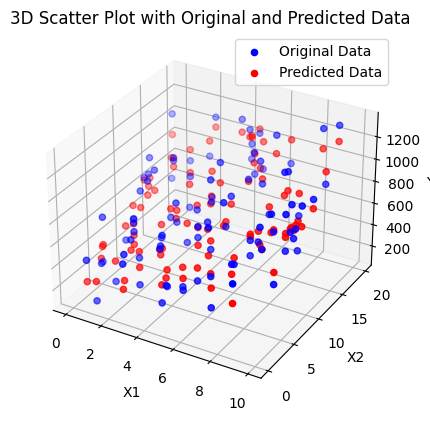

In [ ]:
# Coding here
from mpl_toolkits.mplot3d import Axes3D

# The optimized coefficients from your gradient descent
m1 = 32.73494342264618
m2 = 34.69592128962032
m3 = 222.91661391579635

# Prediction function using the optimized coefficients
def predict(X1, X2, m1, m2, m3):
    return m1*X1 + m2*X2 + m3

# Use this function to predict Y values based on X1 and X2
Y_pred = predict(X1, X2, m1, m2, m3)

# Plotting the original Y and predicted Y values
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Original data points
ax.scatter(X1, X2, Y, color='blue', label='Original Data')

# Predicted data points
ax.scatter(X1, X2, Y_pred, color='red', label='Predicted Data')

# Labeling the axes
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

# Title and legend
plt.title('3D Scatter Plot with Original and Predicted Data')
ax.legend()

# Show the plot
plt.show()
